# **Problem Statement**


The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

1.   Data sourcing and sentiment analysis
2.   Building a recommendation system
3.   Improving the recommendations using the sentiment analysis model
4.   Deploying the end-to-end project with a user interface

In [155]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection  import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
from imblearn.over_sampling import SMOTE
import plotly.offline as pyo
import plotly.io as pio
from wordcloud import WordCloud

pd.options.display.max_colwidth=None
pyo.init_notebook_mode(connected=True)

In [156]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhkalaka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhkalaka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bhkalaka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhkalaka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bhkalaka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **Loading DataSet**

In [157]:
df_reviews = pd.read_csv('DataSet/sample30.csv')
df_reviews.head()

id            brand   
0  AV13O1A8GV-KLJ3akUyj  Universal Music  \
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                                                                                                                                       categories   
0  Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap  \
1                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   

                         manufacturer   
0  Universal Music Group / Cash Money  \
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date   
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z  \
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating   
0                 NaN                 NaN               5  \
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               reviews_text   
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.  \
1                                                                                                                                                                                                                                                                                                     

# **Exploratory Data Analysis - Data Cleaning and Preprocessing**

In [158]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [159]:
# check NaN Count
df_reviews.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [160]:
# Remove the missing row of user_sentiment
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]

In [161]:
#map the categorical user_sentiment to numerical 1 or 0 for modelling
df_reviews['user_sentiment'] = df_reviews['user_sentiment'].map({'Positive':1,'Negative':0})

In [162]:
fig = px.histogram(df_reviews, x='user_sentiment', histnorm='percent', width=300,height=250)
pio.show(fig)

#### Observations

We can see it is class-imabalanced data as 88.77 has positive sentiment and only 11.22 has negative sentiment

So we need to do some smapling to balance the data for input to our model in later sections

In [163]:
fig = px.histogram(df_reviews, x='reviews_rating', histnorm='percent',width=400,height=250)
pio.show(fig)

#### Observations

This is in accordance with user sentiment that most of the users gave positive rating four and five

In [164]:
df_reviews['reviews_rating'].describe()

count    29999.000000
mean         4.483116
std          0.988453
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [165]:
fig = px.box(df_reviews, x='user_sentiment', y='reviews_rating',points='all',width=500,height=350)
pio.show(fig)

#### Observations

It seemd data is not correct and would need to cleanup as we can see from above box plot that user sentiment is 'Negative' but it has high rating such as 4 and 5. 

Similarly there are lower rating such as 1 though sentiment is positive. 



In [166]:
# Update the user_sentiment to 0 (but was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(but was 0), when the reviews_rating is greater than or equal to 4
df_reviews.loc[(df_reviews["user_sentiment"]==1) & (df_reviews["reviews_rating"]<4), "user_sentiment"] = 0
df_reviews.loc[(df_reviews["user_sentiment"]==0) & (df_reviews["reviews_rating"]>=4), "user_sentiment"] = 1

In [167]:
# Lets replot box to check user sentiment vs review rating.
fig = px.box(df_reviews, x='user_sentiment', y='reviews_rating',points='all',width=500,height=500)
pio.show(fig)

<Axes: xlabel='brand'>

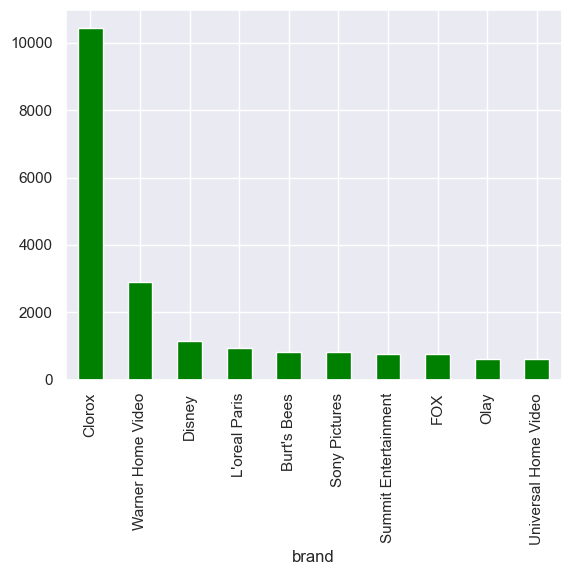

In [168]:
# Filter the top 10 brands among the positive sentiments
df_reviews[df_reviews['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='green')

<Axes: xlabel='brand'>

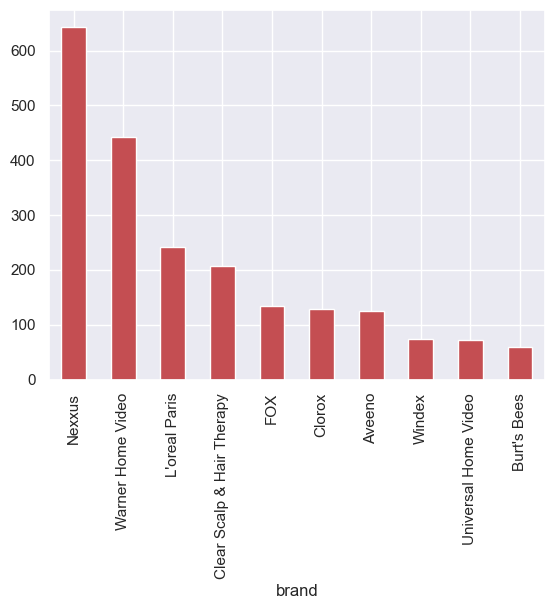

In [169]:
# Filter the top 10 brands among the negative sentiments
df_reviews[df_reviews['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='r')

In [170]:
# Check the total unique products
df_reviews['id'].nunique()

271

In [171]:
# There are total 271 products and let's check which products have most reviewes and less reviewes
df_grouped = df_reviews.groupby(['id', 'name'], as_index=False)['user_sentiment'].count().sort_values(by='user_sentiment', ascending=False)
df_grouped[:10]

id   
93   AVpf3VOfilAPnD_xjpun  \
187  AVpfPaoqLJeJML435Xk9   
163  AVpfJP1C1cnluZ0-e3Xy   
210  AVpfW8y_LJeJML437ySW   
196  AVpfRTh1ilAPnD_xYic2   
103  AVpf63aJLJeJML43F__Q   
85   AVpf0eb2LJeJML43EVSt   
37   AVpe41TqilAPnD_xQH3d   
244  AVpfm8yiLJeJML43AYyu   
91   AVpf2tw1ilAPnD_xjflC   

                                                                               name   
93                        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  \
187                 Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
163                                            Clorox Disinfecting Bathroom Cleaner   
210  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
196             Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
103                                                 Burt's Bees Lip Shimmer, Raisin   
85                                   The Resident Evil Collection 5 Discs (blu-Ray)   
37                                     Mike Dave Need Wedding Dates (dvd + Digital)   
244                                       Nexxus Exxtra Gel Style Creation Sculptor   
91                                                 Red (special Edition) (dvdvideo)   

     user_sentiment  
93             8545  
187            3325  
163            2039  
210            1186  
196            1142  
103             873  
85              845  
37              757  
244             693  
91              672

In [172]:
df_grouped[-10:]

id   
166  AVpfKa3uilAPnD_xWSGx  \
120  AVpfBeN6LJeJML430rrn   
158  AVpfIN84LJeJML432_D9   
155  AVpfHZMxLJeJML432tfs   
145  AVpfFGqP1cnluZ0-ddjG   
144  AVpfF7k8ilAPnD_xUyWf   
143  AVpfErGsLJeJML431yRX   
136  AVpfDflP1cnluZ0-c5RJ   
123  AVpfBuqY1cnluZ0-cTBI   
135  AVpfDbSP1cnluZ0-c3wo   

                                                                                                     name   
166                                                   Fantasy Fields Lil' Sports Fan Step Stool - Teamson  \
120                                                   Roommates No Place Like Home Peel Stick Wall Decals   
158                                                            Every Man Jack Pomade Signature Mint Scent   
155                                                                        Candy Pink Plastic Cups, 20 pk   
145                                           Sea Gull Lighting One Light Wall/bath/vanity-Brushed Nickel   
144                                                         Lite Source Reiko 1 Light Table Lamp - Orange   
143  Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12   
136                                                                       Kenroy Home Table Lamp - Chrome   
123                                                         42 Dual Drop Leaf Table with 2 Madrid Chairs"   
135                                                                     Scotty Mini Double Ended Extender   

     user_sentiment  
166               1  
120               1  
158               1  
155               1  
145               1  
144               1  
143               1  
136               1  
123               1  
135               1

#### Observations

Clorox Disinfecting Wipes Value Pack have highest reviews of 8545 followed by  Godzilla 3d Includes Digital Copy Ultraviolet..

In [173]:
# group by 'id' and pivot the 'user_sentiment' column to show counts of positive and negative values
df_grouped = df_reviews.groupby(['id'])['user_sentiment'].value_counts().unstack(fill_value=0)

# rename the columns to 'positive_count' and 'negative_count'
df_grouped = df_grouped.rename(columns={0: 'negative_count', 1: 'positive_count'})

# join the 'name' column to the pivot table
df_final = pd.merge(df_reviews[['id', 'name']].drop_duplicates(), df_grouped, on='id')

print(df_final)

                       id   
0    AV13O1A8GV-KLJ3akUyj  \
1    AV14LG0R-jtxr-f38QfS   
2    AV16khLE-jtxr-f38VFn   
3    AV1d76w7vKc47QAVhCqn   
4    AV1h6gSl-jtxr-f31p40   
..                    ...   
266  AVpfv4TlilAPnD_xhjNS   
267  AVpfvieo1cnluZ0-qdnu   
268  AVpfVMhR1cnluZ0-ixY8   
269  AVpfVPh3ilAPnD_xZzW9   
270  AVpfW8y_LJeJML437ySW   

                                                                               name   
0                                         Pink Friday: Roman Reloaded Re-Up (w/dvd)  \
1                                        Lundberg Organic Cinnamon Toast Rice Cakes   
2                                                  K-Y Love Sensuality Pleasure Gel   
3                                              J.R. Watkins Hand Cream, Lemon Cream   
4                                                     Ambi Complexion Cleansing Bar   
..                                                                              ...   
266                              Various -

In [174]:
#get the missing row cout for each of the columns
df_reviews.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14067
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28070
reviews_userProvince    29830
reviews_username           63
user_sentiment              0
dtype: int64

In [175]:
# Required columns are reviews_rating, reviews_text, user_sentiment,reviews_username
# removing nan/null from username
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]

In [176]:
#Let's combine the reviews_text and reviews_title for better analysis
# create a copy of the DataFrame
df_reviews_copy = df_reviews.copy()

# fill missing values in the 'reviews_title' column
df_reviews_copy.loc[:, "reviews_title"] = df_reviews_copy["reviews_title"].fillna('')

# concatenate 'reviews_title' and 'reviews_text'
df_reviews_copy.loc[:, "reviews_full_text"] = df_reviews_copy[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

# replace the original DataFrame with the modified copy
df_reviews = df_reviews_copy


### **Text Preprocessing for Modelling**

In [177]:
df_reviews[["reviews_full_text", "user_sentiment"]].sample(10)

reviews_full_text   
1597   A Total Fan of Tim Burton Movies. "Dark Shadows" is Tim Burton's take on the TV show of the same name and a really cool one, at that. Great cast and a cameo of Alice Cooper. Doesn't get much better.Johnny Depp continues a successful partnership with Tim Burton which began with "Ed Wood" back in the early 90's. Check this movie out.  \
1262                                                                                                                                                                                                                     Great Punch. Very easy on the hands to use. I used it on card stock with no problem....especially for a punch of this size.   
27485                                                                                                                                                                                                                                                  Great kids movie. This was a great kid's movie and it was better than the first Planes movie.   
29970                                                                                                                                                                                          Hands down the best butter. I received the product free for testing purposes. I absolutely love it. This review was collected as part of a promotion.   
19127                                                                                                                                                                                                                                   great if you have kids. I have a young child and I think this product is excellent to keep the germs at bay.   
18663                                                                                                                                                                                                                         Wonderful smell. Great product. Cleans everything my two kids can throw at it. Smells great - no hospital clean smell.   
28868                                                                                                                                                                                            Ehhhh. I felt like this conditioner weighed by hair down. It felt heavy and almost a little oily. This review was collected as part of a promotion.   
21438   Change in Formulation Very Disappointing. Used the original product for many years. I've tried the new version for several months and am giving up to look for an alternative. Really wish the old version could be revived or at least an explanation offered for the change. This no longer qualifies as an Extra Hold product in my book.   
19017                                                                                                                                                                                                                                                      Smells great!. Cleans up effectively and smells so good. Better than no-name brand wipes.   
27766                                                                                                                                               Kids will love it. Kids love the film, then again so do I. Always a sucker for some animated films like this. Hope they make more based on or around the car/airplane world they created so far.   

       user_sentiment  
1597                1  
1262                1  
27485               1  
29970               1  
19127               1  
18663               1  
28868               0  
21438               0  
19017               1  
27766               1

In [178]:
'''function to clean the text and remove all the unnecessary elements.'''
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r'[^\w\s]', '', text) # Keep only word charatcers and white spaces and remove other punctuations marks
    text = re.sub("\S*\d\S*", "", text) # remove words that has digit in it
    text = re.sub("\[\s*\w*\s*\]", "", text) # remove text that has pattern of '[ <text> ]'    
    return text


In [179]:
# create clean dataframe with required columns
df_clean = df_reviews[['id','name', 'reviews_full_text', 'user_sentiment']]

In [180]:
df_clean = df_clean.copy()
df_clean.loc[:,"reviews_text"] = df_clean.reviews_full_text.apply(lambda x: clean_text(x))

In [181]:
stop_words = set(stopwords.words('english'))
'''Function to remove the stop words'''
def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [182]:
 # Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
# Map POS tagger tags to WordNet tags
wordnet_tags = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}
'''function to get Lemma form of sentence'''
def get_lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], wordnet_tags.get(tag[1],"n")) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)


In [183]:
df_clean["reviews_text_cleaned"] = df_clean.reviews_text.apply(lambda x: get_lemma_text(x))

In [184]:
df_clean.head()

id                                        name   
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)  \
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
2  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        reviews_full_text   
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.  \
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Good. Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Good. Good flavor.   
3  Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.   
4        

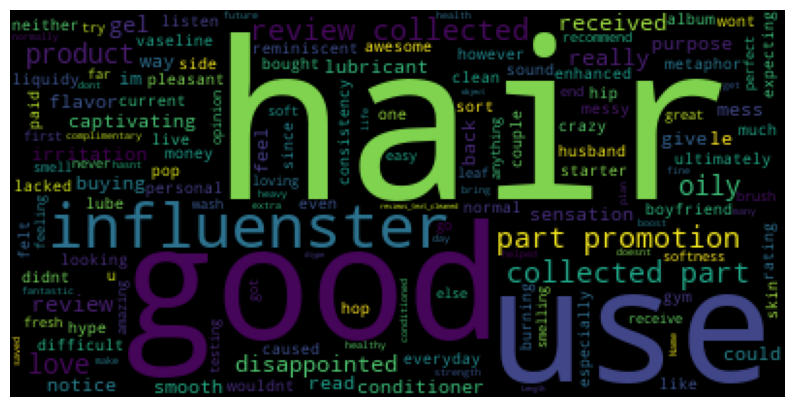

In [185]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df_clean.reviews_text_cleaned))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [186]:
# define a function to get most common words from a list of text strings
def get_most_common_words(text_list, n):
    all_words = nltk.tokenize.word_tokenize(' '.join(text_list))
    fdist = FreqDist(all_words)
    return fdist.most_common(n)

In [187]:
# most common words in positive sentences
pos_reviews = df_clean[df_clean['user_sentiment']==1]
get_most_common_words(pos_reviews['reviews_text_cleaned'],10)

[('great', 14331),
 ('love', 11371),
 ('product', 10805),
 ('movie', 9855),
 ('review', 8861),
 ('part', 8728),
 ('promotion', 8374),
 ('collected', 8373),
 ('wipe', 8036),
 ('use', 7938)]

In [188]:
neg_reviews = df_clean[df_clean['user_sentiment']==0]
get_most_common_words(neg_reviews['reviews_text_cleaned'],10)

[('product', 1934),
 ('hair', 1575),
 ('formula', 1445),
 ('new', 1249),
 ('old', 1057),
 ('movie', 1033),
 ('like', 1012),
 ('good', 984),
 ('gel', 876),
 ('back', 870)]

In [189]:
#function to collect the n-gram frequency of words
def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [190]:
#Print the top 10 words in the bigram frequency
common_words = get_top_n_ngram(pos_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

0     1
0     review collected  8372
1  collected promotion  8372
2          clorox wipe  2808
3        great product  1937
4          great movie  1735
5             easy use  1523
6          love clorox  1206
7         love product  1117
8           good movie   909
9    disinfecting wipe   841

In [191]:
common_words = get_top_n_ngram(neg_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

0    1
0          new formula  520
1          old formula  512
2     review collected  369
3  collected promotion  369
4            bring old  360
5           exxtra gel  205
6  shampoo conditioner  150
7             gel year  125
8         product year  124
9     received product  119

#### **Feature Extraction**

In [192]:
reviewes_txt = df_clean["reviews_text_cleaned"]
user_sentiment = df_clean['user_sentiment']

In [193]:
no_of_classes= len(pd.Series(user_sentiment).value_counts())

In [194]:
# Create TF-ID vectorized model to create features from text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=750, max_df=0.9, min_df=0.001, binary=True, 
                                   ngram_range=(1,2))
reviewes_txt_features = tfidf_vectorizer.fit_transform(df_clean['reviews_text_cleaned'])



In [195]:
print(len(tfidf_vectorizer.get_feature_names_out()))

750


In [196]:
print(tfidf_vectorizer.get_feature_names_out())

['able' 'absolutely' 'absolutely love' 'acting' 'action' 'action movie'
 'actor' 'actually' 'add' 'added' 'addition' 'adult' 'age' 'ago' 'amazing'
 'amazing product' 'anymore' 'apply' 'area' 'available' 'away' 'awesome'
 'awesome love' 'awesome movie' 'awesome product' 'awful' 'baby' 'bad'
 'bag' 'balm' 'bathroom' 'bathroom kitchen' 'bathroom review' 'beat'
 'beautiful' 'bee' 'believe' 'best' 'best buy' 'best product' 'better'
 'big' 'bit' 'black' 'bleach' 'blu' 'blu ray' 'bluray' 'body' 'bottle'
 'bought' 'box' 'boy' 'brand' 'bring' 'bring cocoa' 'bring old' 'brown'
 'burt' 'burt bee' 'buy' 'buying' 'came' 'canister' 'car' 'care' 'carpet'
 'carry' 'cast' 'cd' 'chair' 'change' 'changed' 'character' 'child'
 'chili' 'chip' 'classic' 'classroom' 'clay' 'clean' 'clean bathroom'
 'clean disinfect' 'clean fresh' 'clean great' 'clean kitchen'
 'clean love' 'clean mess' 'clean review' 'clean smell' 'clean ups'
 'clean use' 'cleaned' 'cleaner' 'cleaning' 'cleaning product' 'cleanup'
 'clear' '

In [197]:
reviewes_txt_train, reviewes_txt_test, user_sent_train, user_sent_test = train_test_split(reviewes_txt_features, user_sentiment, random_state=42, test_size=0.25)

In [198]:
counter = Counter(user_sent_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
reviewes_txt_train, user_sent_train = sm.fit_resample(reviewes_txt_train, user_sent_train)

counter = Counter(user_sent_train)
print('After',counter)

Before Counter({1: 20087, 0: 2365})
After Counter({1: 20087, 0: 20087})


## **Model Building**

In [199]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("*"*30)
        print("\n")
        
        self.plot_roc_curve()
        
        return self.result_metrics

    def plot_roc_curve(self):
      y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
      fpr, tpr, thresholds = metrics.roc_curve(self.y_test, y_pred_prob)
      # Calculate area under the ROC curve (AUC)
      roc_auc = metrics.auc(fpr, tpr)
      # Plot ROC curve
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC)')
      plt.legend(loc="lower right")
      plt.show()



        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = metrics.accuracy_score(self.y_test, y_pred_class)
        precision = metrics.precision_score(self.y_test, y_pred_class)
        recall = metrics.recall_score(self.y_test, y_pred_class)
        f1score = metrics.f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(confusion_matrix,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(metrics.classification_report(self.y_test, y_pred_class))
               

### Model 1: Logistic Regression

In [200]:
log_model = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
log_model_builder = ModelBuilder(log_model, reviewes_txt_train, reviewes_txt_test, user_sent_train, user_sent_test)



******************************
Accuracy is : 87.4%
Precision is : 97.3%
Recall is : 88.4%
F1 Score is : 92.6%
Roc-Auc Score is:91.4%
******************************


              precision    recall  f1-score   support

           0       0.44      0.79      0.56       770
           1       0.97      0.88      0.93      6714

    accuracy                           0.87      7484
   macro avg       0.70      0.83      0.74      7484
weighted avg       0.92      0.87      0.89      7484

******************************




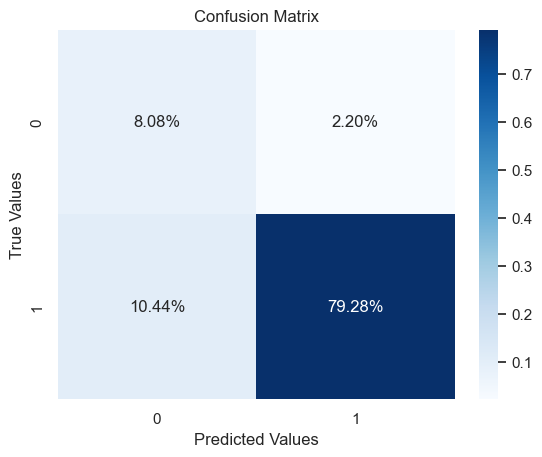

******************************




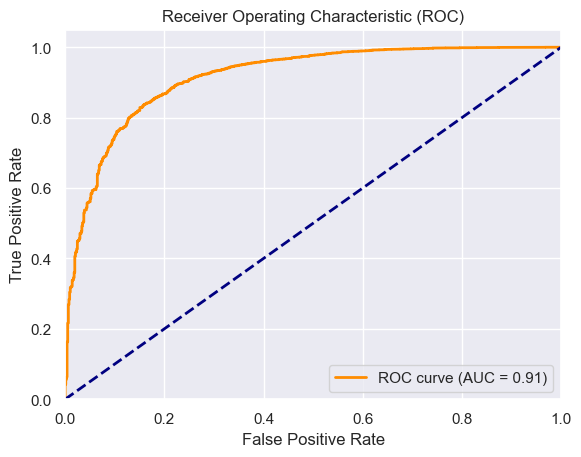

In [201]:
# Train and Predict the Test Labels
user_sent_pred  = log_model_builder.train_model()
lr_metrics = log_model_builder.evaluate_model(user_sent_pred)

### Model 2: Naive Bayes

In [202]:
mnb = MultinomialNB(alpha=1.0)
mnb_modebuilder = ModelBuilder(mnb, reviewes_txt_train, reviewes_txt_test, user_sent_train, user_sent_test)



******************************
Accuracy is : 81.3%
Precision is : 97.7%
Recall is : 81.1%
F1 Score is : 88.6%
Roc-Auc Score is:89.9%
******************************


              precision    recall  f1-score   support

           0       0.34      0.83      0.48       770
           1       0.98      0.81      0.89      6714

    accuracy                           0.81      7484
   macro avg       0.66      0.82      0.68      7484
weighted avg       0.91      0.81      0.84      7484

******************************




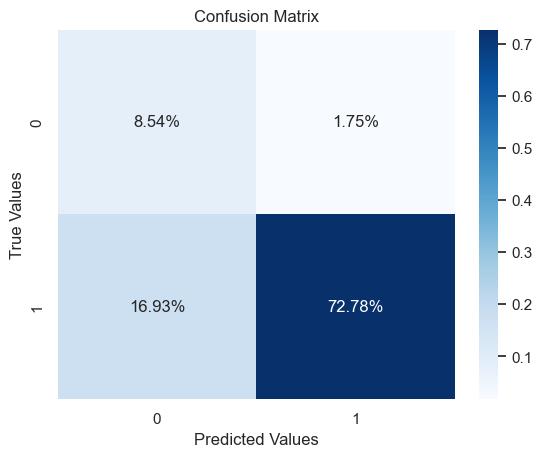

******************************




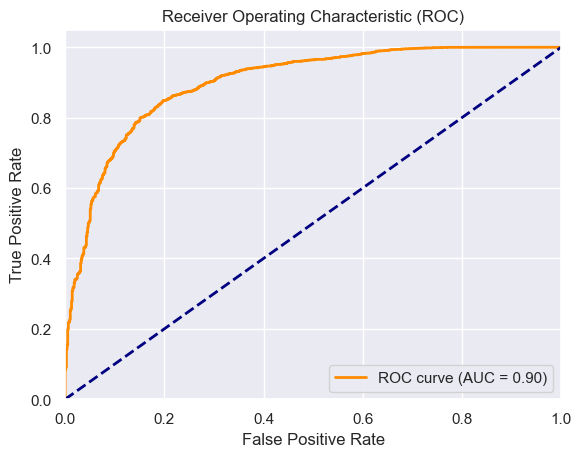

In [203]:
# Train and Predict the Test Labels
y_pred_class  = mnb_modebuilder.train_model()
nb_metrics = mnb_modebuilder.evaluate_model(y_pred_class)

### Model 3: Decision Tree

In [204]:
dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)
dt_modelbuilder = ModelBuilder(dt, reviewes_txt_train, reviewes_txt_test, user_sent_train, user_sent_test)



******************************
Accuracy is : 75.1%
Precision is : 97.1%
Recall is : 74.4%
F1 Score is : 84.3%
Roc-Auc Score is:82.5%
******************************


              precision    recall  f1-score   support

           0       0.27      0.81      0.40       770
           1       0.97      0.74      0.84      6714

    accuracy                           0.75      7484
   macro avg       0.62      0.77      0.62      7484
weighted avg       0.90      0.75      0.80      7484

******************************




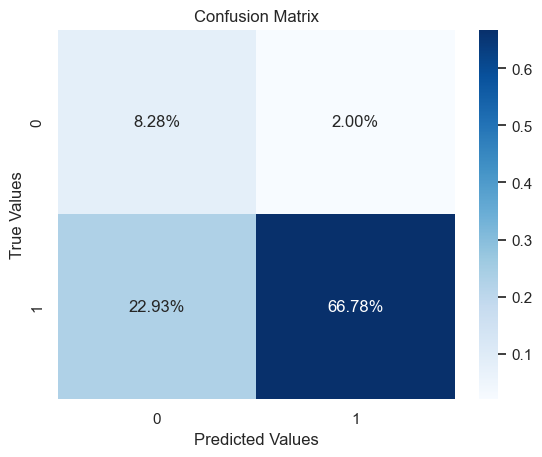

******************************




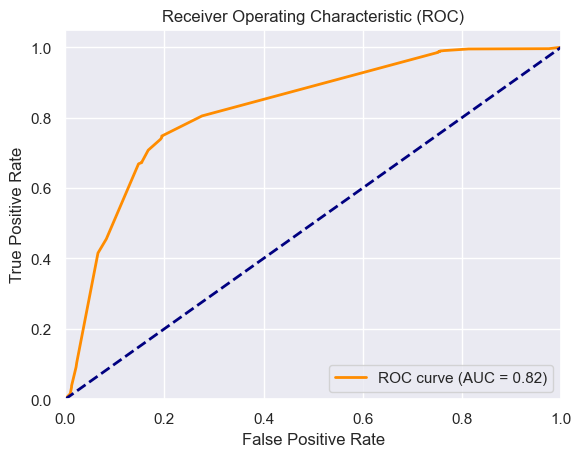

In [205]:
y_pred_class  = dt_modelbuilder.train_model()
dt_metrics = dt_modelbuilder.evaluate_model(y_pred_class)

### Model 4: Random Forest

In [206]:
rf = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini")
rf_modelbuilder = ModelBuilder(rf, reviewes_txt_train, reviewes_txt_test, user_sent_train, user_sent_test)



******************************
Accuracy is : 75.1%
Precision is : 97.1%
Recall is : 74.4%
F1 Score is : 84.3%
Roc-Auc Score is:82.5%
******************************


              precision    recall  f1-score   support

           0       0.27      0.81      0.40       770
           1       0.97      0.74      0.84      6714

    accuracy                           0.75      7484
   macro avg       0.62      0.77      0.62      7484
weighted avg       0.90      0.75      0.80      7484

******************************




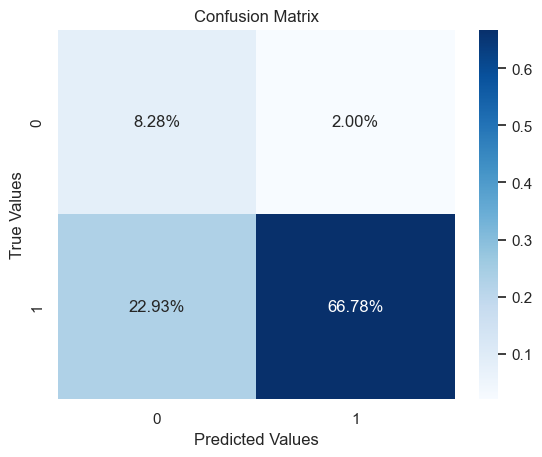

******************************




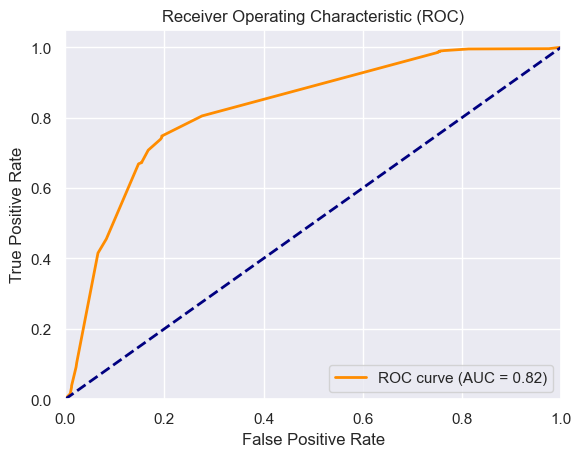

In [207]:
y_pred_class  = dt_modelbuilder.train_model()
rf_metrics = dt_modelbuilder.evaluate_model(y_pred_class)

### Hyper Parameter Tuning

In [208]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [209]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [210]:
grid_search.fit(reviewes_txt_train, user_sent_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1', verbose=1)

In [211]:
rf_best = grid_search.best_estimator_
rf_modebuilder = ModelBuilder(rf_best, reviewes_txt_train, reviewes_txt_test, user_sent_train, user_sent_test)



******************************
Accuracy is : 79.1%
Precision is : 96.8%
Recall is : 79.3%
F1 Score is : 87.2%
Roc-Auc Score is:87.4%
******************************


              precision    recall  f1-score   support

           0       0.30      0.77      0.43       770
           1       0.97      0.79      0.87      6714

    accuracy                           0.79      7484
   macro avg       0.63      0.78      0.65      7484
weighted avg       0.90      0.79      0.83      7484

******************************




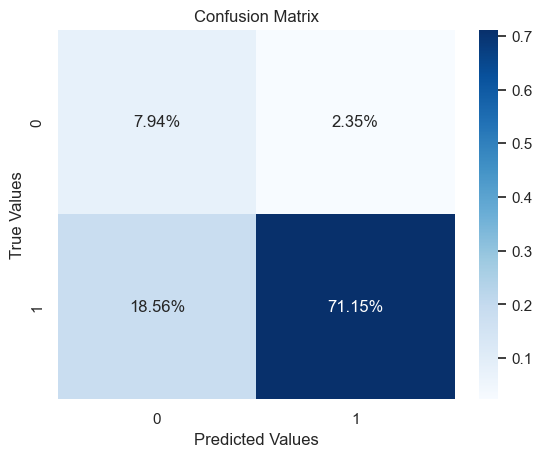

******************************




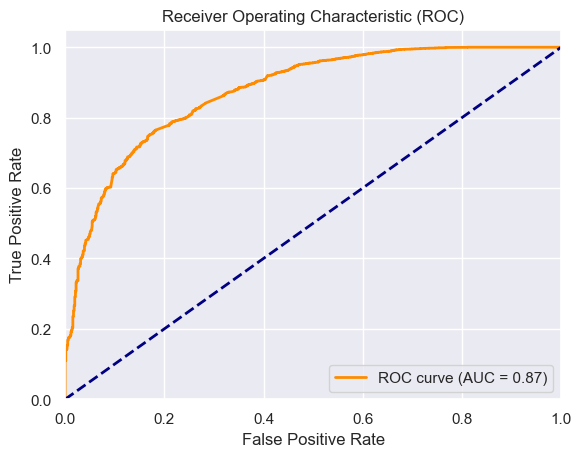

In [212]:
# Train and Predict the Test Labels
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

### Model 5: XGBoost Classifier

In [213]:
xg = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42) #based on the tuned parameters
xg_modebuilder = ModelBuilder(xg, reviewes_txt_train, reviewes_txt_test, user_sent_train, user_sent_test)



******************************
Accuracy is : 91.2%
Precision is : 95.6%
Recall is : 94.5%
F1 Score is : 95.1%
Roc-Auc Score is:90.8%
******************************


              precision    recall  f1-score   support

           0       0.57      0.62      0.59       770
           1       0.96      0.95      0.95      6714

    accuracy                           0.91      7484
   macro avg       0.76      0.78      0.77      7484
weighted avg       0.92      0.91      0.91      7484

******************************




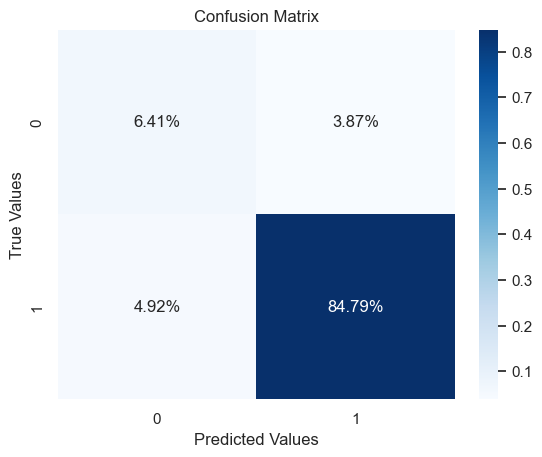

******************************




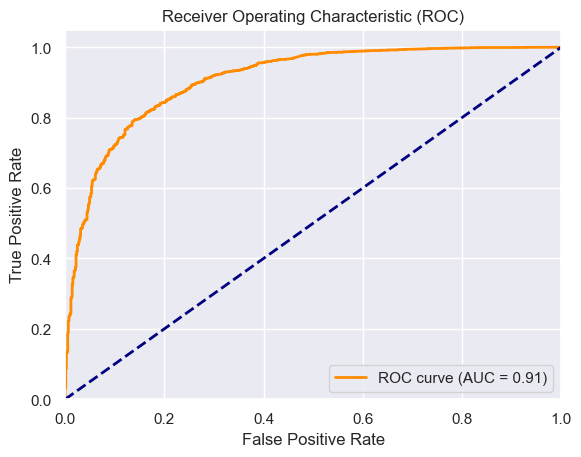

In [214]:
# Train and Predict the Test Labels
y_pred_class  = xg_modebuilder.train_model()
xg_metrics = xg_modebuilder.evaluate_model(y_pred_class)

### Model Comparison

In [215]:
# Creating a table which contain all the metrics

metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'], 
        'Logistic Regression': lr_metrics,
        'Naive Bayes': nb_metrics,
        'Decision Tree': dt_metrics,
         'Random Forrest': rf_metrics,
        'XG Boost': xg_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Decision Tree','Random Forrest',
                                                    'XG Boost'] )

df_metrics

Metric  Logistic Regression  Naive Bayes  Decision Tree  Random Forrest   
0   Accuracy             0.873597     0.813201       0.750668        0.790887  \
1  Precision             0.972942     0.976515       0.970862        0.968006   
2     Recall             0.883676     0.811290       0.744415        0.793119   
3    F1Score             0.926163     0.886267       0.842691        0.871879   
4  Auc Score             0.914369     0.898980       0.824817        0.874102   

   XG Boost  
0  0.912079  
1  0.956299  
2  0.945189  
3  0.950712  
4  0.907946

### Observations

As per above results XG Boost is performing better and so we can take that model.

#### Save model

In [216]:
def save_object(obj, filename):
    filename = "pickle\\"+filename+'.pkl'
    pickle.dump(obj, open(filename, 'wb'))

In [217]:
save_object(xg, 'sentiment-classification-xg-boost-model')

In [218]:
save_object(tfidf_vectorizer, 'tfidf-vectorizer')

In [219]:
save_object(df_clean, 'cleaned-data')

# Recommendation System

In [220]:
df_recommendation = df_reviews[["id", "name", "reviews_rating", "reviews_username"]]

In [221]:
df_recommendation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29936 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29936 non-null  object
 1   name              29936 non-null  object
 2   reviews_rating    29936 non-null  int64 
 3   reviews_username  29936 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [222]:
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

## User - User based Colloborative Approach

In [223]:
df_user_pivot = pd.pivot_table(train,index="reviews_username", columns = "id", values = "reviews_rating").fillna(0)
df_user_pivot.head(10)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...   
reviews_username                                              ...   
00sab00                            0.0                   0.0  ...  \
01impala                           0.0                   0.0  ...   
02dakota                           0.0                   0.0  ...   
02deuce                            0.0                   0.0  ...   
0325home                           0.0                   0.0  ...   
06stidriver                        0.0                   0.0  ...   
08dallas                           0.0                   0.0  ...   
09mommy11                          0.0                   0.0  ...   
1.11E+24                           0.0                   0.0  ...   
1085                               0.0                   0.0  ...   

id                AVpfrFDZLJeJML43Bmv0  AVpfrTyiLJeJML43BrSI   
reviews_username               

In [224]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [225]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train["reviews_rating"] = dummy_train["reviews_rating"].apply(lambda x: 0 if x>=1 else 1)

In [226]:
df_user_dummy_pivot = pd.pivot_table(dummy_train,index="reviews_username", columns = "id", values = "reviews_rating").fillna(1)
df_user_dummy_pivot.head(10)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS   
reviews_username                                               
00sab00                            1.0                   1.0  \
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O   
reviews_username                                               
00sab00                            1.0                   1.0  \
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX   
reviews_username                                               
00sab00                            1.0                   1.0  \
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_   
reviews_username                                               
00sab00                            1.0                   1.0  \
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...   
reviews_username                                              ...   
00sab00                            1.0                   1.0  ...  \
01impala                           1.0                   1.0  ...   
02dakota                           1.0                   1.0  ...   
02deuce                            1.0                   1.0  ...   
0325home                           1.0                   1.0  ...   
06stidriver                        1.0                   1.0  ...   
08dallas                           1.0                   1.0  ...   
09mommy11                          1.0                   1.0  ...   
1.11E+24                           1.0                   1.0  ...   
1085                               1.0                   1.0  ...   

id                AVpfrFDZLJeJML43Bmv0  AVpfrTyiLJeJML43BrSI   
reviews_username               

### User Similarity matrix

In [227]:
df_user_pivot.index.nunique()

19427

In [228]:
user_correlation = cosine_similarity(df_user_pivot)
user_correlation[np.isnan(user_correlation)] = 0 # replace with 0 if any nans
user_correlation[user_correlation<0] = 0 # make of if correlation is negative
print(user_correlation)
print(user_correlation.shape)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]
(19427, 19427)


### Prediction

In [229]:
user_predicted_ratings = np.dot(user_correlation, df_user_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 1.20913332, ..., 2.9103958 , 0.        ,
        0.54410719],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 1.64034869, 0.        ,
        0.57353933],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135]])

In [230]:
user_predicted_ratings.shape

(19427, 260)

In [231]:
dummy_train.shape

(22452, 4)

In [232]:
#since we are interested in products that are not rated by the user, we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,df_user_dummy_pivot)
user_final_rating.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O   
reviews_username                                               
00sab00                       1.209133             13.576034  \
01impala                      3.123475             15.578925   
02dakota                      3.123475             15.578925   
02deuce                       3.123475             15.578925   
0325home                      0.000000             11.344965   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_   
reviews_username                                               
00sab00                            0.0              2.256552  \
01impala                           0.0              0.000000   
02dakota                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              6.010227   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...   
reviews_username                                              ...   
00sab00                       0.440415              3.136671  ...  \
01impala                      2.340823              2.119252  ...   
02dakota                      2.340823              2.119252  ...   
02deuce                       2.340823              2.119252  ...   
0325home                      6.937603              2.097953  ...   

id                AVpfrFDZLJeJML43Bmv0  AVpfrTyiLJeJML43BrSI   
reviews_username                                               
00sab00                       0.449467              0.422577  \
01impala                      1.421338              0.267261   
02dakota                      1.421338              0.267261   
02deuce                       1.421338              0.267261   
0325home                      0.000000              0.445435   

id                AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc   
reviews_username                                               
00sab00                       0.000000                   0.0  \
01impala                      0.000000                   0.0   
02dakota                      0.000000                   0.0   
02deuce                       0.000000                   0.0   
0325home                      3.535534                   0.0   

id                AVpfsQoeilAPnD_xgfx5  AVpfshNsLJeJML43CB8q   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V   
reviews_username                                               
00sab00                       2.121320              2.910396  \
01impala                      0.000000              3.001580   
02dakota                      0.000000              3.001580   
02deuce                       0.000000              3

## Find 20 Recommendations of user

In [233]:
recommendations = user_final_rating.loc["00sab00"].sort_values(ascending=False)[0:20]
recommendations

id
AVpfPaoqLJeJML435Xk9    84.436199
AVpfRTh1ilAPnD_xYic2    62.082681
AVpf3VOfilAPnD_xjpun    49.380466
AVpf0eb2LJeJML43EVSt    47.998833
AVpf2tw1ilAPnD_xjflC    28.199383
AVpfJP1C1cnluZ0-e3Xy    28.179991
AVpfM_ytilAPnD_xXIJb    23.029813
AVpf385g1cnluZ0-s0_t    15.663312
AVpe31o71cnluZ0-YrSD    15.484610
AV1YGDqsGV-KLJ3adc-O    13.576034
AVpfR5m0LJeJML436K3W    11.048358
AVpfBrUZilAPnD_xTUly    10.996019
AVpf63aJLJeJML43F__Q     9.584809
AVpfOIrkilAPnD_xXgDG     9.544828
AVpf5olc1cnluZ0-tPrO     9.342609
AVpfov9TLJeJML43A7B0     7.396904
AVpe8gsILJeJML43y6Ed     7.140246
AVpfPnrU1cnluZ0-g9rL     7.095200
AVpfMpZ51cnluZ0-f_L9     6.948982
AVpe6n2_LJeJML43yOgE     6.799822
Name: 00sab00, dtype: float64

In [234]:
#display the top 20 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

id   
0      AVpfPaoqLJeJML435Xk9  \
2464   AVpfRTh1ilAPnD_xYic2   
3315   AVpf3VOfilAPnD_xjpun   
9689   AVpf0eb2LJeJML43EVSt   
10326  AVpf2tw1ilAPnD_xjflC   
10845  AVpfJP1C1cnluZ0-e3Xy   
12408  AVpfM_ytilAPnD_xXIJb   
12604  AVpf385g1cnluZ0-s0_t   
12748  AVpe31o71cnluZ0-YrSD   
12935  AV1YGDqsGV-KLJ3adc-O   
13201  AVpfR5m0LJeJML436K3W   
13343  AVpfBrUZilAPnD_xTUly   
13466  AVpf63aJLJeJML43F__Q   
14137  AVpfOIrkilAPnD_xXgDG   
14242  AVpf5olc1cnluZ0-tPrO   
14371  AVpfov9TLJeJML43A7B0   
14440  AVpe8gsILJeJML43y6Ed   
14671  AVpfPnrU1cnluZ0-g9rL   
14809  AVpfMpZ51cnluZ0-f_L9   
14862  AVpe6n2_LJeJML43yOgE   

                                                                                  name   
0                      Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd  \
2464               Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
3315                         Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
9689                                    The Resident Evil Collection 5 Discs (blu-Ray)   
10326                                                 Red (special Edition) (dvdvideo)   
10845                                             Clorox Disinfecting Bathroom Cleaner   
12408                                                Tostitos Bite Size Tortilla Chips   
12604                                                           Hormel Chili, No Beans   
12748                    Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)   
12935                            Windex Original Glass Cleaner Refill 67.6oz (2 Liter)   
13201                                                   Jason Aldean - They Don't Know   
13343                             Coty Airspun Face Powder, Translucent Extra Coverage   
13466                                                  Burt's Bees Lip Shimmer, Raisin   
14137                                                            Alex Cross (dvdvideo)   
14242                                        Chester's Cheese Flavored Puffcorn Snacks   
14371                                  Bisquick Original Pancake And Baking Mix - 40oz   
14440  Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack   
14671                     Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
14809               Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz   
14862                                   Tresemme Kertatin Smooth Infusing Conditioning   

       similarity_score  
0             84.436199  
2464          62.082681  
3315          49.380466  
9689          47.998833  
10326         28.199383  
10845         28.179991  
12408         23.029813  
12604         15.663312  
12748         15.484610  
12935         13.576034  
13201         11.048358  
13343         10.996019  
13466          9.584809  
14137          9.544828  
14242          9.342609  
14371          7.396904  
14440          7.140246  
14671          7.095200  
14809          6.948982  
14862          6.799822

## User - User Evaluation

In [235]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1795, 4)

In [236]:
# convert into the user-movie matrix.
common_user_based_matrix = pd.pivot_table(common,index="reviews_username", columns = "id", values = "reviews_rating")
common_user_based_matrix.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  ...   
reviews_username                                              ...   
1234                               NaN                   NaN  ...  \
1234567                            NaN                   NaN  ...   
123charlie                         NaN                   NaN  ...   
1witch                             NaN                   NaN  ...   
85lisa                             NaN                   NaN  ...   

id                AVpfov9TLJeJML43A7B0  AVpfpM2yilAPnD_xfmDG   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpfrTyiLJeJML43BrSI  AVpfrgjFLJeJML43BvCc   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpfs0tUilAPnD_xgqN2  AVpfthSailAPnD_xg3ON   
reviews_username                                               
1234                               NaN                   NaN  \
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN               

In [237]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

0      1      2      3      4      5      6      7      8         9       
0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.948683  \
1    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  0.000000   
2    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  0.000000   
3    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  0.000000   
4    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0  0.000000   

   ...  19417  19418  19419  19420  19421  19422  19423  19424     19425   
0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.948683  \
1  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
2  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
3  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
4  ...    1.0    0.0    0.0    0.0    1.0    1.0    1.0    1.0  0.000000   

   19426  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    1.0  

[5 rows x 19427 columns]

In [238]:
user_correlation_df["reviewes_username"] = df_user_pivot.index
user_correlation_df.set_index("reviewes_username",inplace=True)
user_correlation_df.head()

0      1      2      3      4      5      6      7       
reviewes_username                                                           
00sab00              1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  \
01impala             0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
02dakota             0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
02deuce              0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
0325home             0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

                   8         9      ...  19417  19418  19419  19420  19421   
reviewes_username                   ...                                      
00sab00              0.0  0.948683  ...    0.0    0.0    0.0    0.0    0.0  \
01impala             0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
02dakota             0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
02deuce              0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
0325home             1.0  0.000000  ...    1.0    0.0    0.0    0.0    1.0   

                   19422  19423  19424     19425  19426  
reviewes_username                                        
00sab00              0.0    0.0    0.0  0.948683    0.0  
01impala             0.0    0.0    0.0  0.000000    0.0  
02dakota             0.0    0.0    0.0  0.000000    0.0  
02deuce              0.0    0.0    0.0  0.000000    0.0  
0325home             1.0    1.0    1.0  0.000000    1.0  

[5 rows x 19427 columns]

In [239]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_user_pivot.index.tolist()
user_correlation_common_tmp_df1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [240]:
user_correlation_common_tmp_df1.shape

(1530, 19427)

In [241]:
 user_correlation_common_tmp_df2 = user_correlation_common_tmp_df1.T[user_correlation_common_tmp_df1.T.index.isin(list_name)]

In [242]:
user_correlation_common_df = user_correlation_common_tmp_df2.T

In [243]:
user_correlation_common_df.shape

(1530, 1530)

In [244]:
user_correlation_common_df[user_correlation_common_df<0]=0

common_user_predicted_ratings = np.dot(user_correlation_common_df, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 7.79183531, 0.        , ..., 0.        , 0.        ,
        2.29277852],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.31227896, 0.        , ..., 0.        , 0.        ,
        1.49255579],
       ...,
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.86700847, 0.        , ..., 0.        , 0.        ,
        1.74077656],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ]])

In [245]:
dummy_test = common.copy()

dummy_test["reviews_rating"] = dummy_test["reviews_rating"].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index="reviews_username", columns = "id", values = "reviews_rating").fillna(0)

In [246]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [247]:
common_user_predicted_ratings.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  ...   
reviews_username                                              ...   
1234                               0.0                   0.0  ...  \
1234567                            0.0                   0.0  ...   
123charlie                         0.0                   0.0  ...   
1witch                             0.0                   0.0  ...   
85lisa                             0.0                   0.0  ...   

id                AVpfov9TLJeJML43A7B0  AVpfpM2yilAPnD_xfmDG   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpfrTyiLJeJML43BrSI  AVpfrgjFLJeJML43BvCc   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpfs0tUilAPnD_xgqN2  AVpfthSailAPnD_xg3ON   
reviews_username                                               
1234                               0.0                   0.0  \
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0               

In [248]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)
y = (scaler.transform(X))

print(y)
print(y.shape)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(1530, 129)


In [249]:
common_ = pd.pivot_table(common,index="reviews_username", columns = "id", values = "reviews_rating")

In [250]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [251]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.1659769223467763


## Item Based Recommendation

In [252]:
df_item_pivot = pd.pivot_table(train,
    index="id",
    columns="reviews_username",
    values="reviews_rating"
)

df_item_pivot.head()

reviews_username      00sab00  01impala  02dakota  02deuce  0325home   
id                                                                     
AV13O1A8GV-KLJ3akUyj      NaN       NaN       NaN      NaN       NaN  \
AV14LG0R-jtxr-f38QfS      NaN       NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  ...   
id                                                                      ...   
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN  ...  \
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN  ...   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN  ...   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN  ...   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN  ...   

reviews_username      zsarah  zsazsa  zubb  zuttle  zwithanx  zxcsdfd  zxjki   
id                                                                             
AV13O1A8GV-KLJ3akUyj     NaN     NaN   NaN     NaN       NaN      NaN    NaN  \
AV14LG0R-jtxr-f38QfS     NaN     NaN   NaN     NaN       NaN      NaN    NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN   NaN     NaN       NaN      NaN    NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN   NaN     NaN       NaN      NaN    NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN   NaN     NaN       NaN      NaN    NaN   

reviews_username      zyiah4  zzdiane  zzz1127  
id                                              
AV13O1A8GV-KLJ3akUyj     NaN      NaN      NaN  
AV14LG0R-jtxr-f38QfS     NaN      NaN      NaN  
AV16khLE-jtxr-f38VFn     NaN      NaN      NaN  
AV1YGDqsGV-KLJ3adc-O     NaN      NaN      NaN  
AV1YIch7GV-KLJ3addeG     NaN      NaN      NaN  

[5 rows x 19427 columns]

In [253]:
mean = np.nanmean(df_item_pivot, axis=1)
df_subtracted = (df_item_pivot.T-mean).T

In [254]:
df_subtracted.head()

reviews_username      00sab00  01impala  02dakota  02deuce  0325home   
id                                                                     
AV13O1A8GV-KLJ3akUyj      NaN       NaN       NaN      NaN       NaN  \
AV14LG0R-jtxr-f38QfS      NaN       NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  ...   
id                                                                      ...   
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN  ...  \
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN  ...   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN  ...   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN  ...   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN  ...   

reviews_username      zsarah  zsazsa  zubb  zuttle  zwithanx  zxcsdfd  zxjki   
id                                                                             
AV13O1A8GV-KLJ3akUyj     NaN     NaN   NaN     NaN       NaN      NaN    NaN  \
AV14LG0R-jtxr-f38QfS     NaN     NaN   NaN     NaN       NaN      NaN    NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN   NaN     NaN       NaN      NaN    NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN   NaN     NaN       NaN      NaN    NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN   NaN     NaN       NaN      NaN    NaN   

reviews_username      zyiah4  zzdiane  zzz1127  
id                                              
AV13O1A8GV-KLJ3akUyj     NaN      NaN      NaN  
AV14LG0R-jtxr-f38QfS     NaN      NaN      NaN  
AV16khLE-jtxr-f38VFn     NaN      NaN      NaN  
AV1YGDqsGV-KLJ3adc-O     NaN      NaN      NaN  
AV1YIch7GV-KLJ3addeG     NaN      NaN      NaN  

[5 rows x 19427 columns]

In [255]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
item_correlation[item_correlation<0]=0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Item Based Prediction

In [256]:
item_predicted_ratings = np.dot((df_item_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00568296, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00946238],
       [0.        , 0.        , 0.        , ..., 0.00716692, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756991]])

In [257]:
print(item_predicted_ratings.shape)
print(df_user_dummy_pivot.shape)

(19427, 260)
(19427, 260)


In [258]:
# Filter ratings for products that are not rated by user

item_final_rating = np.multiply(item_predicted_ratings,df_user_dummy_pivot)
item_final_rating.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O   
reviews_username                                               
00sab00                            0.0              0.009141  \
01impala                           0.0              0.000000   
02dakota                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              0.000000   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_   
reviews_username                                               
00sab00                            0.0               0.00000  \
01impala                           0.0               0.00000   
02dakota                           0.0               0.00000   
02deuce                            0.0               0.00000   
0325home                           0.0               0.00132   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...   
reviews_username                                              ...   
00sab00                       0.000000              0.005833  ...  \
01impala                      0.000000              0.004556  ...   
02dakota                      0.000000              0.007593  ...   
02deuce                       0.000000              0.006074  ...   
0325home                      0.003772              0.001795  ...   

id                AVpfrFDZLJeJML43Bmv0  AVpfrTyiLJeJML43BrSI   
reviews_username                                               
00sab00                            0.0              0.000000  \
01impala                           0.0              0.092658   
02dakota                           0.0              0.154430   
02deuce                            0.0              0.123544   
0325home                           0.0              0.000000   

id                AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc   
reviews_username                                               
00sab00                       0.000000                   0.0  \
01impala                      0.000000                   0.0   
02dakota                      0.000000                   0.0   
02deuce                       0.000000                   0.0   
0325home                      0.003785                   0.0   

id                AVpfsQoeilAPnD_xgfx5  AVpfshNsLJeJML43CB8q   
reviews_username                                               
00sab00                            0.0                   0.0  \
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V   
reviews_username                                               
00sab00                       0.019346              0.005683  \
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0

### Finding the top 20 recommendations for the user

In [259]:
item_recommendations = item_final_rating.loc["00sab00"].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpe7sl91cnluZ0-aI1Y    0.152368
AVpfE7puilAPnD_xUcCW    0.144328
AVpfJcHuLJeJML433ZrY    0.060676
AVpfNc9cLJeJML434tza    0.058283
AVpfOIrkilAPnD_xXgDG    0.039941
AVpf0thK1cnluZ0-r8vR    0.035366
AVpe_dxlilAPnD_xSiHI    0.032794
AVpe6PCDLJeJML43yFQH    0.030287
AVpf0eb2LJeJML43EVSt    0.027716
AVpfQtEm1cnluZ0-hUpe    0.027024
AVpe6FfKilAPnD_xQmHi    0.023243
AVpfHf4wLJeJML432vqK    0.021629
AVpe31o71cnluZ0-YrSD    0.020853
AVpfthSailAPnD_xg3ON    0.019346
AVpe_pDG1cnluZ0-bjSf    0.016482
AVpf5CnILJeJML43FjaU    0.015415
AVpe6n2_LJeJML43yOgE    0.015234
AVpfoSS51cnluZ0-oVH9    0.015202
AVpe4pnBilAPnD_xQDeb    0.015176
AVpfOmKwLJeJML435GM7    0.014340
Name: 00sab00, dtype: float64

In [260]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
#final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

id   
0     AVpe7sl91cnluZ0-aI1Y  \
28    AVpfE7puilAPnD_xUcCW   
33    AVpfJcHuLJeJML433ZrY   
41    AVpfNc9cLJeJML434tza   
47    AVpfOIrkilAPnD_xXgDG   
152   AVpf0thK1cnluZ0-r8vR   
250   AVpe_dxlilAPnD_xSiHI   
256   AVpe6PCDLJeJML43yFQH   
260   AVpf0eb2LJeJML43EVSt   
897   AVpfQtEm1cnluZ0-hUpe   
918   AVpe6FfKilAPnD_xQmHi   
934   AVpfHf4wLJeJML432vqK   
942   AVpe31o71cnluZ0-YrSD   
1129  AVpfthSailAPnD_xg3ON   
1134  AVpe_pDG1cnluZ0-bjSf   
1142  AVpf5CnILJeJML43FjaU   
1151  AVpe6n2_LJeJML43yOgE   
1192  AVpfoSS51cnluZ0-oVH9   
1233  AVpe4pnBilAPnD_xQDeb   
1238  AVpfOmKwLJeJML435GM7   

                                                                      name   
0                          Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans  \
28                                Bilbao Nightstand Gray Oak - South Shore   
33                                                        Equals (blu-Ray)   
41                  Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White   
47                                                   Alex Cross (dvdvideo)   
152                                    100:Complete First Season (blu-Ray)   
250               The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus   
256                                 Wagan Smartac 80watt Inverter With Usb   
260                         The Resident Evil Collection 5 Discs (blu-Ray)   
897                              Jolly Time Select Premium Yellow Pop Corn   
918                           Chex Muddy Buddies Brownie Supreme Snack Mix   
934                                 Trend Lab Park Nursing Cover - Paisley   
942          Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)   
1129                                 Musselman Apple Sauce, Cinnamon, 48oz   
1134                           Bi-O-kleen Spray & Wipe All Purpose Cleaner   
1142  WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black   
1151                        Tresemme Kertatin Smooth Infusing Conditioning   
1192                    Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks   
1233                       Moom Express Pre Waxed Strips For Face & Bikini   
1238              Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   

      similarity_score  
0             0.152368  
28            0.144328  
33            0.060676  
41            0.058283  
47            0.039941  
152           0.035366  
250           0.032794  
256           0.030287  
260           0.027716  
897           0.027024  
918           0.023243  
934           0.021629  
942           0.020853  
1129          0.019346  
1134          0.016482  
1142          0.015415  
1151          0.015234  
1192          0.015202  
1233          0.015176  
1238          0.014340

#### Evaluation Item - Item

In [261]:
common =  test[test.id.isin(train.id)]
common.shape

(7472, 4)

In [262]:
common_item_based_matrix = common.pivot_table( index="id",
    columns="reviews_username",
    values="reviews_rating")

In [263]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

0    1    2    3    4    5    6    7    8    9    ...  250  251  252  253   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  \

   254  255  256  257  258  259  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 260 columns]

In [264]:
item_correlation_df["id"] = df_subtracted.index
item_correlation_df.set_index("id",inplace=True)
item_correlation_df.head()

0    1    2    3    4    5    6    7    8    9    ...   
id                                                                      ...   
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  \
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
AV16khLE-jtxr-f38VFn  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                      250  251  252  253  254  255  256  257  258  259  
id                                                                      
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 260 columns]

In [265]:
list_name = common.id.tolist()

In [266]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [267]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [268]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00756991, ..., 0.        , 0.        ,
        0.00946238]])

In [269]:
dummy_test = common.copy()
dummy_test["reviews_rating"] = dummy_test["reviews_rating"].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index="id", columns="reviews_username", values="reviews_rating").fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [270]:
common_ = pd.pivot_table(common,index="id", columns="reviews_username", values="reviews_rating")

In [271]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


c:\Bhoga\Projects\workspaces\workspace-recommendation\Recommendation_System\.venv\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning:

All-NaN slice encountered

c:\Bhoga\Projects\workspaces\workspace-recommendation\Recommendation_System\.venv\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning:

All-NaN slice encountered



In [272]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [273]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.554191898642536


On comparing the RMSE values of User Based Recommender and Item Based Recommender, User based recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [302]:
## Save the user_finak_ratings object
save_object(user_final_rating, 'user_final_rating')

#### Top Product Recommendations - Recommendation of 20 products and filtering by sentiment model

In [295]:
def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = df_clean[df_clean.id.isin(recommendations)]
        #transfor the input data using saved tf-idf vectorizer
        X =  tfidf_vectorizer.transform(temp["reviews_text_cleaned"].values.astype(str))
        temp_df = temp.copy()
        temp_df.loc[:,"predicted_sentiment"]= xg.predict(X)
        temp_df = temp_df[['name','predicted_sentiment']]
        temp_grouped = temp_df.groupby('name', as_index=False).count()
        temp_grouped_df = temp_grouped.copy()
        temp_grouped_df.loc[:,"pos_review_count"] = temp_grouped_df.name.apply(lambda x: temp_df[(temp_df.name==x) & (temp_df.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped_df.loc[:,"total_review_count"] = temp_grouped_df['predicted_sentiment']
        temp_grouped_df.loc[:,'pos_sentiment_percent'] = np.round(temp_grouped_df["pos_review_count"]/temp_grouped_df["total_review_count"]*100,2)
        return temp_grouped_df.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [296]:
get_sentiment_recommendations("08dallas")

name   
0                    Batherapy Natural Mineral Bath Sport Liquid, 16 oz  \
2                                    Cetaphil Gentle Skin Cleanser, 2oz   
5             Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
4                                  Clorox Disinfecting Bathroom Cleaner   
15  Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
19                       The Resident Evil Collection 5 Discs (blu-Ray)   
14                    Olay Regenerist Deep Hydration Regenerating Cream   
17         Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
7                               Eagle Fat Free Sweetened Condensed Milk   
16                                     Red (special Edition) (dvdvideo)   
1                                              CeraVe SA Renewing Cream   
3                             Chester's Cheese Flavored Puffcorn Snacks   
6                  Coty Airspun Face Powder, Translucent Extra Coverage   
10                               Meguiar's Deep Crystal Car Wash 64-Oz.   
8       Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
12           Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
11                         Mike Dave Need Wedding Dates (dvd + Digital)   
9                                                Hormel Chili, No Beans   
18                                 The Honest Company Laundry Detergent   
13                            Nexxus Exxtra Gel Style Creation Sculptor   

    predicted_sentiment  pos_review_count  total_review_count   
0                     2                 2                   2  \
2                     7                 7                   7   
5                  8525              8481                8525   
4                  2039              2008                2039   
15                 1142              1090                1142   
19                  845               800                 845   
14                  634               600                 634   
17                  186               174                 186   
7                    15                14                  15   
16                  672               625                 672   
1                    25                23                  25   
3                   177               154                 177   
6                   158               137                 158   
10                   20                17                  20   
8                  3325              2823                3325   
12                   29                24                  29   
11                  757               611                 757   
9                   196               153                 196   
18                   20                15                  20   
13                  692                51                 692   

    pos_sentiment_percent  
0                  100.00  
2                  100.00  
5                   99.48  
4                   98.48  
15                  95.45  
19                  94.67  
14                  94.64  
17                  93.55  
7                   93.33  
16                  93.01  
1                   92.00  
3                   87.01  
6                   86.71  
10                  85.00  
8                   84.90  
12                  82.76  
11                  80.71  
9                   78.06  
18                  75.00  
13                   7.37

In [297]:
#get the top 5
get_sentiment_recommendations("08dallas")[:5]

name   
0                    Batherapy Natural Mineral Bath Sport Liquid, 16 oz  \
2                                    Cetaphil Gentle Skin Cleanser, 2oz   
5             Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
4                                  Clorox Disinfecting Bathroom Cleaner   
15  Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   

    predicted_sentiment  pos_review_count  total_review_count   
0                     2                 2                   2  \
2                     7                 7                   7   
5                  8525              8481                8525   
4                  2039              2008                2039   
15                 1142              1090                1142   

    pos_sentiment_percent  
0                  100.00  
2                  100.00  
5                   99.48  
4                   98.48  
15                  95.45

In [300]:
X_sample = tfidf_vectorizer.transform(["Awesome product, will recommend"])
y_pred_sample = xg.predict(X_sample)
y_pred_sample

array([1])

In [301]:
X_sample = tfidf_vectorizer.transform(["worst product, quality is poor"])
y_pred_sample = xg.predict(X_sample)
y_pred_sample

array([0])